The below command helps in installing python packages in google colab. If those are not available and to install those packages, remove '!' at start of each line and execute those in python terminal

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

Importing the packages required with alias name for convenience

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

**Importing data**

In [3]:
data_orig=pd.read_csv('ENB2012_data.csv')
data=data_orig.copy()
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [5]:
data.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


With mean of all features are almost half of min and max values, there is possibility that all features follow normal distribution

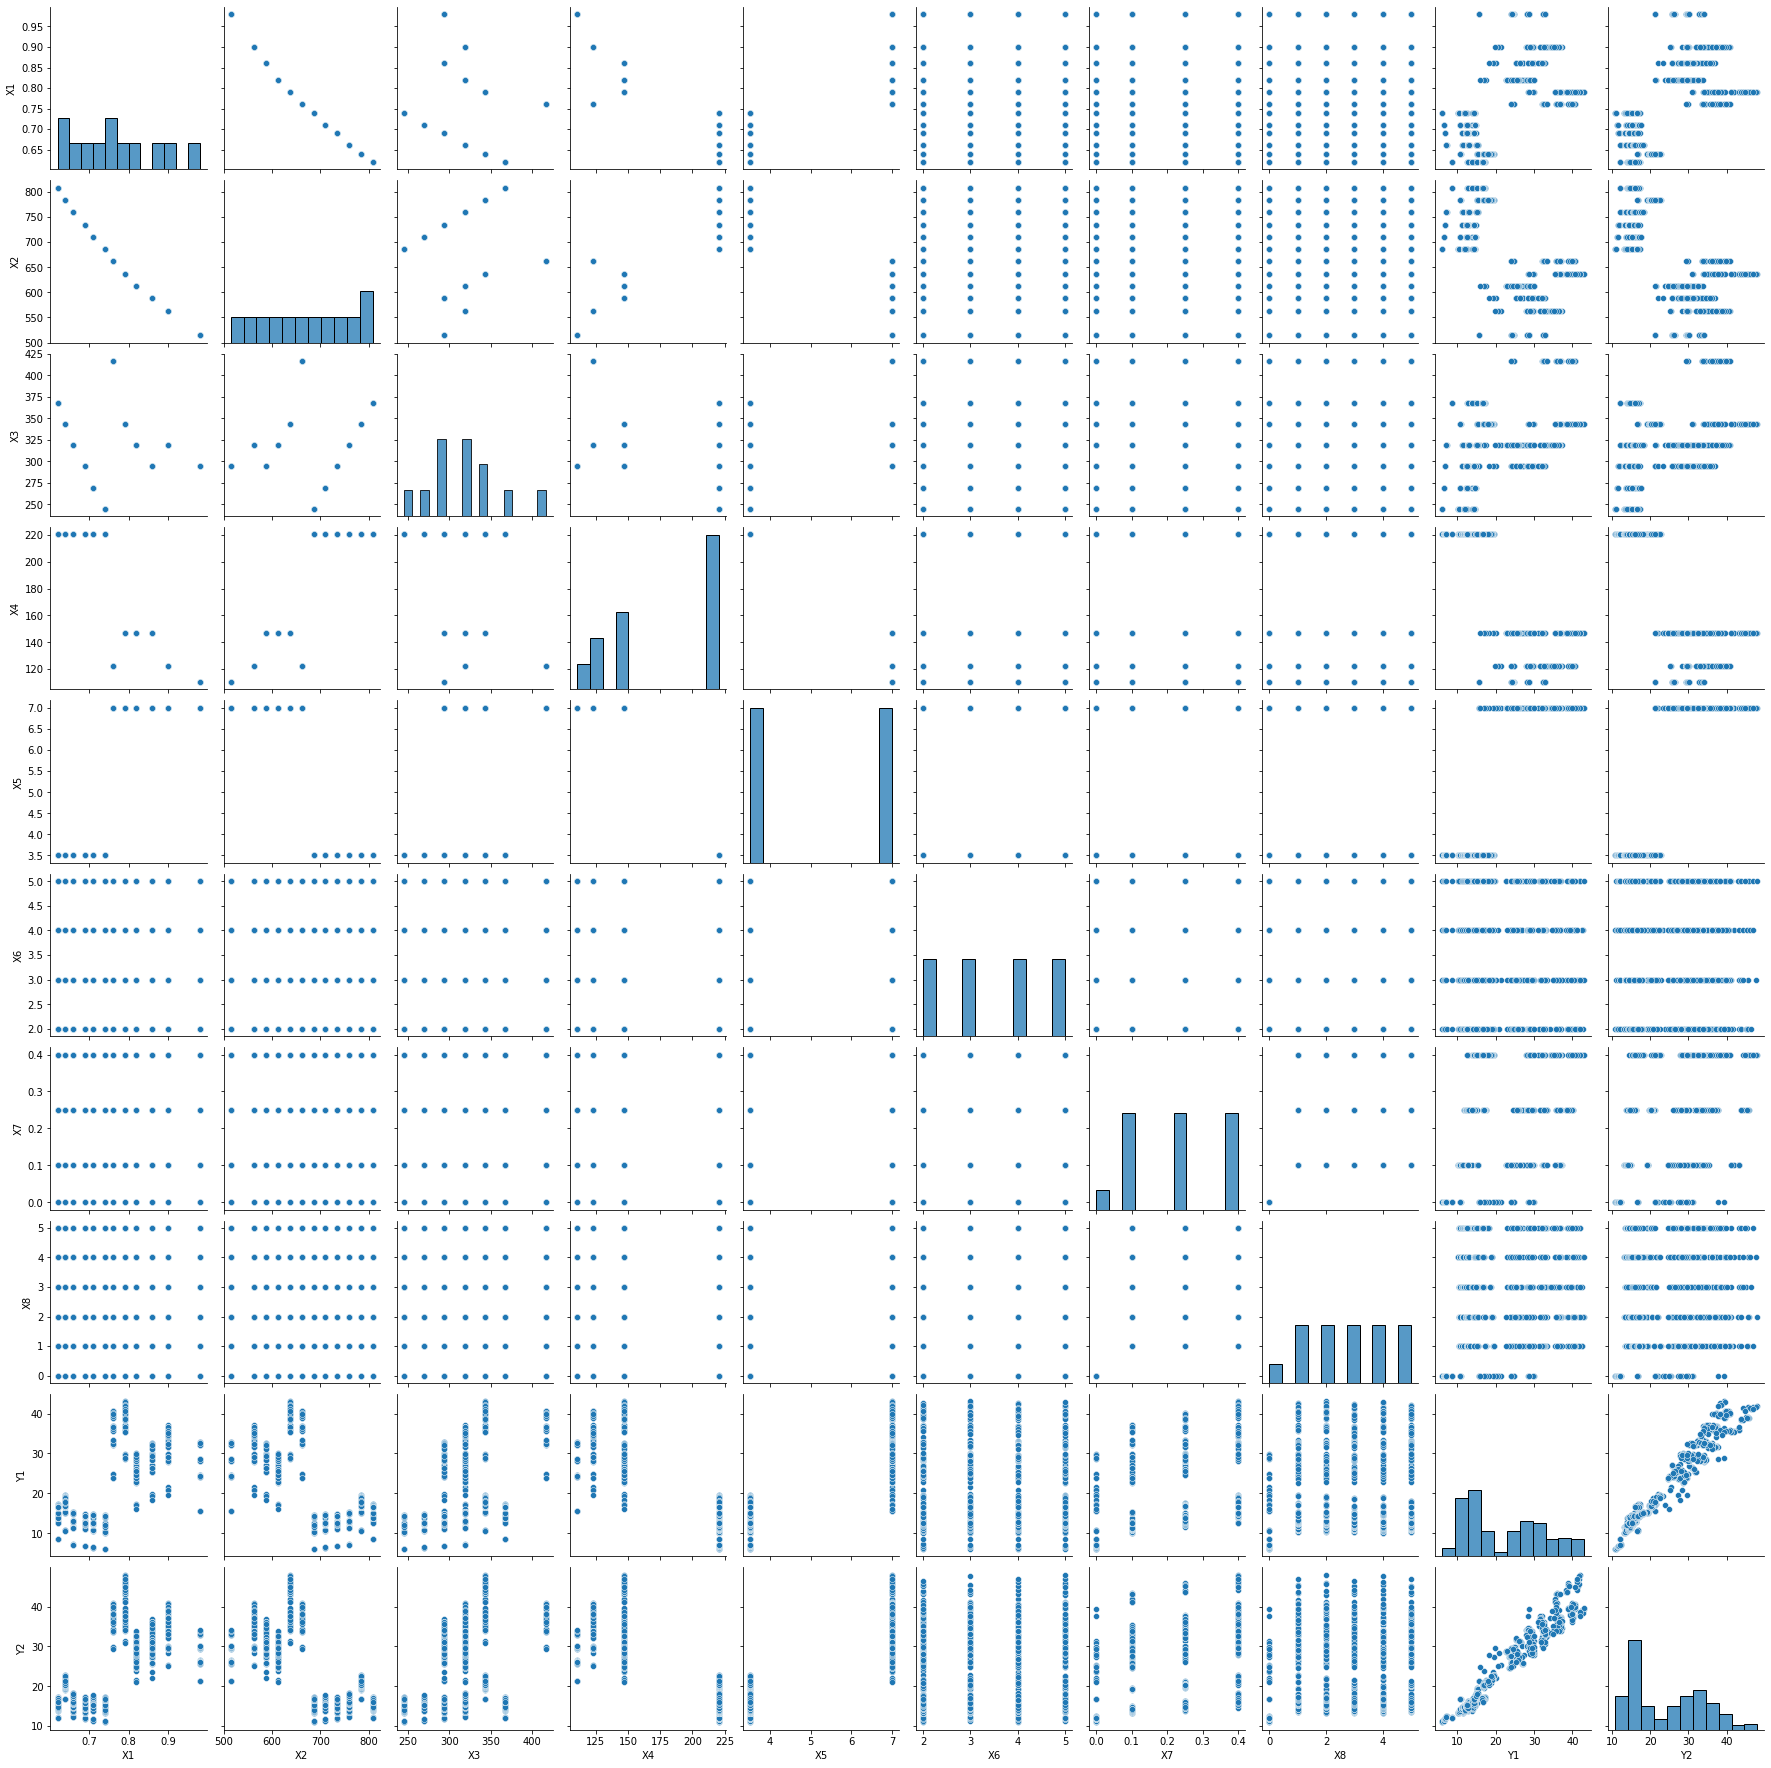

In [7]:
sns.pairplot(data)

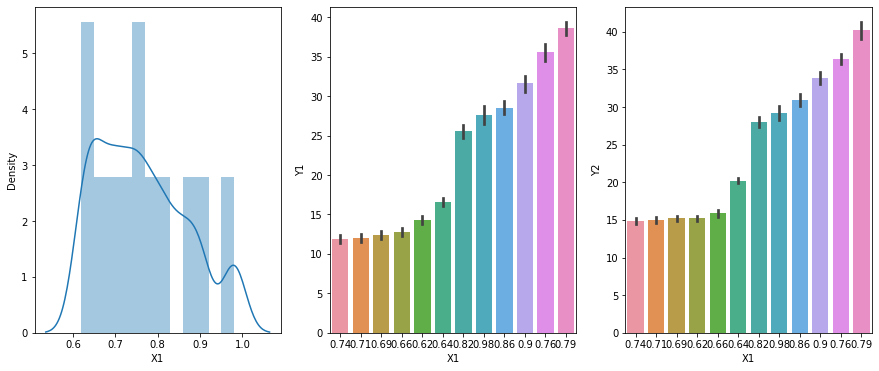

In [8]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.distplot(data['X1'])
ax=fig.add_subplot(1,3,2)
sns.barplot(x='X1',y='Y1',data=data,order=data[['X1','Y1']].groupby('X1').mean().sort_values('Y1').index)
ax=fig.add_subplot(1,3,3)
sns.barplot(x='X1',y='Y2',data=data,order=data[['X1','Y2']].groupby('X1').mean().sort_values('Y2').index)

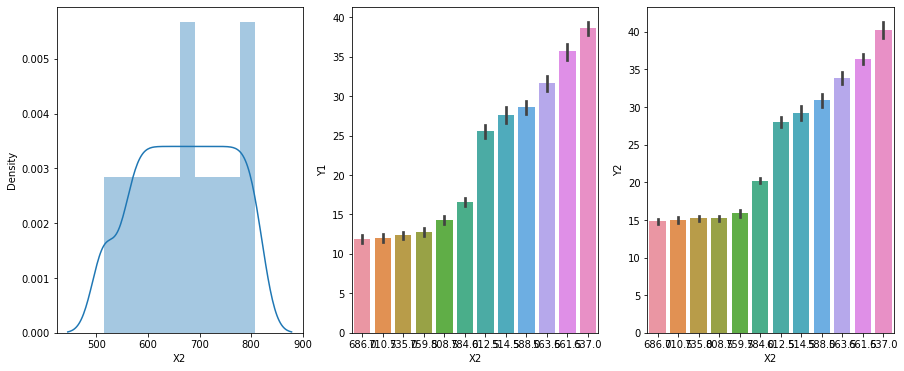

In [9]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.distplot(data['X2'])
ax=fig.add_subplot(1,3,2)
sns.barplot(x='X2',y='Y1',data=data,order=data[['X2','Y1']].groupby('X2').mean().sort_values('Y1').index)
ax=fig.add_subplot(1,3,3)
sns.barplot(x='X2',y='Y2',data=data,order=data[['X2','Y2']].groupby('X2').mean().sort_values('Y2').index)

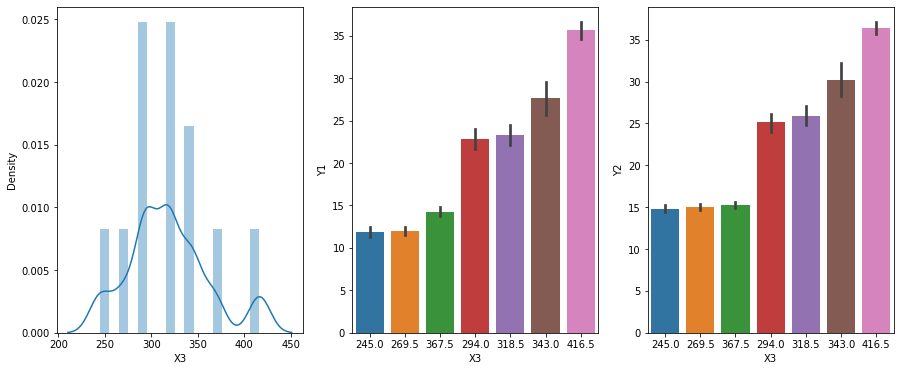

In [10]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.distplot(data['X3'])
ax=fig.add_subplot(1,3,2)
sns.barplot(x='X3',y='Y1',data=data,order=data[['X3','Y1']].groupby('X3').mean().sort_values('Y1').index)
ax=fig.add_subplot(1,3,3)
sns.barplot(x='X3',y='Y2',data=data,order=data[['X3','Y2']].groupby('X3').mean().sort_values('Y2').index)

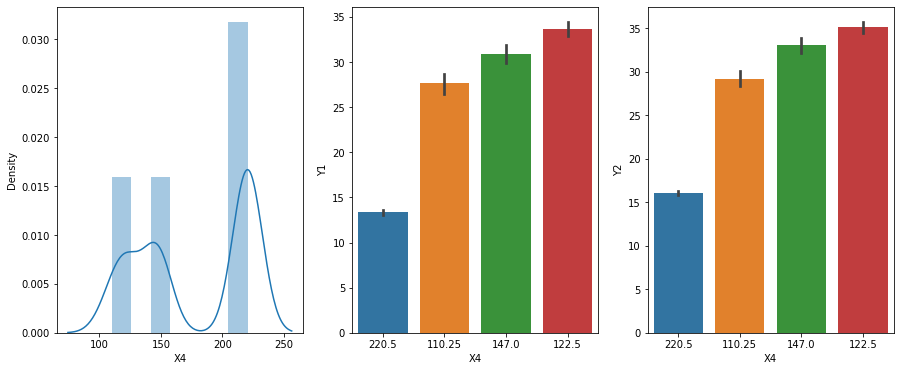

In [11]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.distplot(data['X4'])
ax=fig.add_subplot(1,3,2)
sns.barplot(x='X4',y='Y1',data=data,order=data[['X4','Y1']].groupby('X4').mean().sort_values('Y1').index)
ax=fig.add_subplot(1,3,3)
sns.barplot(x='X4',y='Y2',data=data,order=data[['X4','Y2']].groupby('X4').mean().sort_values('Y2').index)

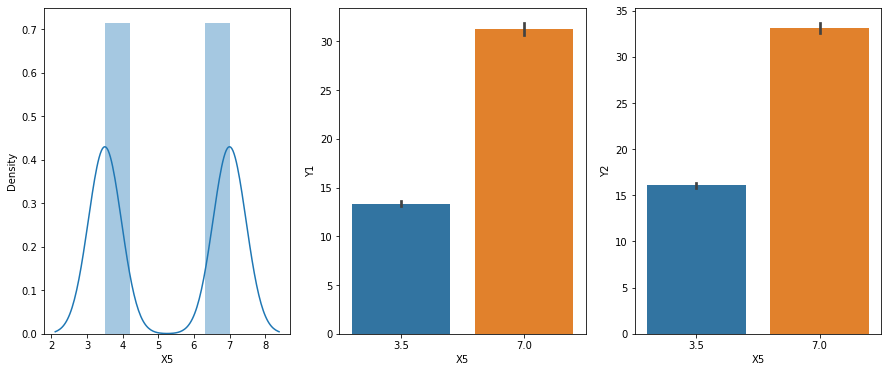

In [12]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.distplot(data['X5'])
ax=fig.add_subplot(1,3,2)
sns.barplot(x='X5',y='Y1',data=data,order=data[['X5','Y1']].groupby('X5').mean().sort_values('Y1').index)
ax=fig.add_subplot(1,3,3)
sns.barplot(x='X5',y='Y2',data=data,order=data[['X5','Y2']].groupby('X5').mean().sort_values('Y2').index)

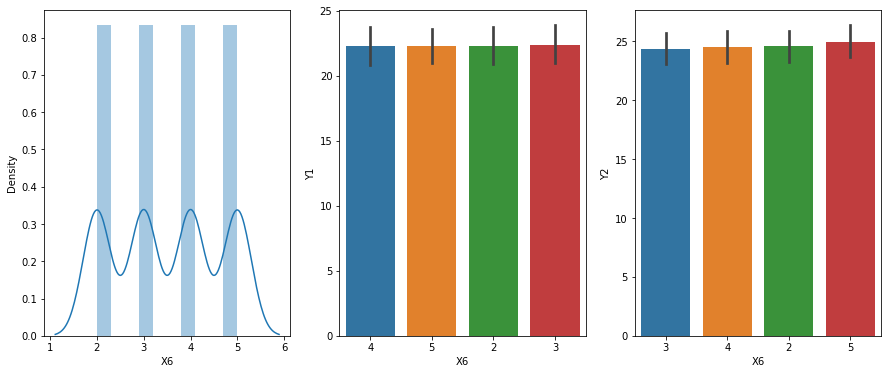

In [13]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.distplot(data['X6'])
ax=fig.add_subplot(1,3,2)
sns.barplot(x='X6',y='Y1',data=data,order=data[['X6','Y1']].groupby('X6').mean().sort_values('Y1').index)
ax=fig.add_subplot(1,3,3)
sns.barplot(x='X6',y='Y2',data=data,order=data[['X6','Y2']].groupby('X6').mean().sort_values('Y2').index)

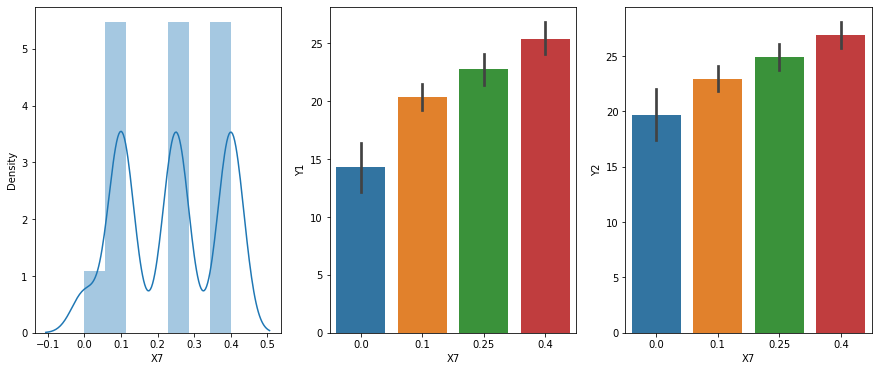

In [14]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.distplot(data['X7'])
ax=fig.add_subplot(1,3,2)
sns.barplot(x='X7',y='Y1',data=data,order=data[['X7','Y1']].groupby('X7').mean().sort_values('Y1').index)
ax=fig.add_subplot(1,3,3)
sns.barplot(x='X7',y='Y2',data=data,order=data[['X7','Y2']].groupby('X7').mean().sort_values('Y2').index)

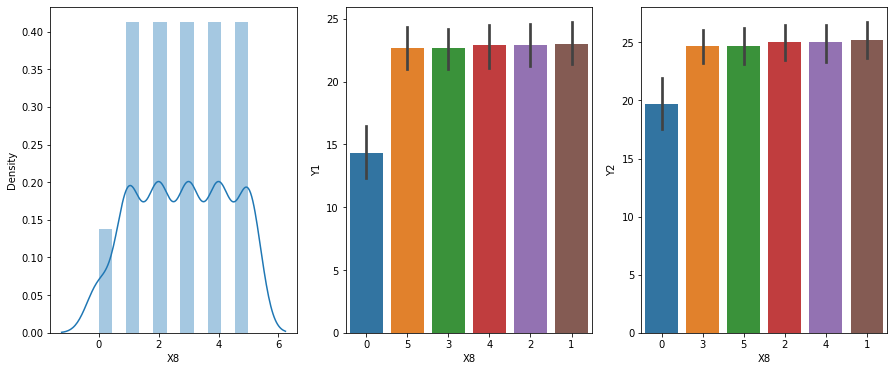

In [15]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,3,1)
sns.distplot(data['X8'])
ax=fig.add_subplot(1,3,2)
sns.barplot(x='X8',y='Y1',data=data,order=data[['X8','Y1']].groupby('X8').mean().sort_values('Y1').index)
ax=fig.add_subplot(1,3,3)
sns.barplot(x='X8',y='Y2',data=data,order=data[['X8','Y2']].groupby('X8').mean().sort_values('Y2').index)

In [16]:
def data_split_scale(x,y,test_size,random_state,scaler):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=random_state)
  scale=scaler
  x_train=scale.fit_transform(x_train)
  x_test=scale.transform(x_test)
  return x_train,x_test,y_train,y_test

In [17]:
x=data.iloc[:,:-2]
y1=data.iloc[:,-2]
y2=data.iloc[:,-1]
x1_train,x1_test,y1_train,y1_test=data_split_scale(x,y1,0.2,10,StandardScaler())
x2_train,x2_test,y2_train,y2_test=data_split_scale(x,y2,0.15,10,MinMaxScaler())
print(x1_train.shape,x1_test.shape,x2_train.shape,x2_test.shape)
print(y1_train.shape,y1_test.shape,y2_train.shape,y2_test.shape)

(614, 8) (154, 8) (652, 8) (116, 8)
(614,) (154,) (652,) (116,)


In [18]:
def outlier_mu_sigma(data,column_name,replace=True):
  mean=data[column_name].mean()
  std=data[column_name].std()
  if(replace):
    data[(data[column_name] < mean-3*std) & (data[column_name] > mean+3*std)]=mean
  else:
    data.drop(data[(data[column_name] < mean-3*std) & (data[column_name] > mean+3*std)])
  return data

In [19]:
def outlier_iqr(data,column_name,replace=True):
  pass

In [33]:
def model_train(x_train,x_test,y_train,y_test,model_name,model,cv=0,test_score=False):
  warnings.filterwarnings('ignore')
  mod=model
  mod.fit(x_train,y_train)
  y_pred=mod.predict(x_test)
  print(f"{model_name} r2 score is {r2_score(y_test,y_pred)}")
  if(cv!=0):
    from sklearn.model_selection import cross_validate
    cv_score=cross_validate(mod,x_train,y_train,scoring="r2",cv=cv,return_train_score=True)
    print(f"{model_name} cross validation train score is {cv_score['train_score'].mean()}")
    print(f"{model_name} cross validation test score is {cv_score['test_score'].mean()}")
  if(test_score):
    print(f"{model_name} model train score is {mod.score(x_train,y_train)}")
    print(f"{model_name} model test score is {mod.score(x_test,y_test)}")
  return mod

In [34]:
print("Heating Load")
linreg_heating = model_train(x1_train,x1_test,y1_train,y1_test,'Linear Regression',LinearRegression(),15,True)
print("Cooling Load")
linreg_cooling = model_train(x2_train,x2_test,y2_train,y2_test,'Linear Regression',LinearRegression(),10,True)

Heating Load
Linear Regression r2 score is 0.9315740865119593
Linear Regression cross validation train score is 0.9112498229492854
Linear Regression cross validation test score is 0.9062186423844629
Linear Regression model train score is 0.9121667766412919
Linear Regression model test score is 0.9315740865119593
Cooling Load
Linear Regression r2 score is 0.9053724798764152
Linear Regression cross validation train score is 0.8846276973945686
Linear Regression cross validation test score is 0.8802419067854332
Linear Regression model train score is 0.8844442197707417
Linear Regression model test score is 0.9053724798764152


In [35]:
print("Heating Load")
lasreg_heating = model_train(x1_train,x1_test,y1_train,y1_test,'Lasso Regression',Lasso(),15,True)
print("Cooling Load")
lasreg_cooling = model_train(x2_train,x2_test,y2_train,y2_test,'Lasso Regression',Lasso(),10,True)

Heating Load
Lasso Regression r2 score is 0.9083683154818882
Lasso Regression cross validation train score is 0.8806979611128607
Lasso Regression cross validation test score is 0.8775249975142321
Lasso Regression model train score is 0.8806808883422583
Lasso Regression model test score is 0.9083683154818882
Cooling Load
Lasso Regression r2 score is 0.7884715902170382
Lasso Regression cross validation train score is 0.7521398552750868
Lasso Regression cross validation test score is 0.7500157614844236
Lasso Regression model train score is 0.7521329366117424
Lasso Regression model test score is 0.7884715902170382


In [36]:
print("Heating Load")
ridreg_heating = model_train(x1_train,x1_test,y1_train,y1_test,'Ridge Regression',Ridge(),15,True)
print("Cooling Load")
ridreg_cooling = model_train(x2_train,x2_test,y2_train,y2_test,'Ridge Regression',Ridge(),10,True)

Heating Load
Ridge Regression r2 score is 0.9311087514222516
Ridge Regression cross validation train score is 0.9122987582873864
Ridge Regression cross validation test score is 0.9074871317322113
Ridge Regression model train score is 0.9122324386786544
Ridge Regression model test score is 0.9311087514222516
Cooling Load
Ridge Regression r2 score is 0.8995210902858812
Ridge Regression cross validation train score is 0.8822122879895085
Ridge Regression cross validation test score is 0.8785233900798313
Ridge Regression model train score is 0.8822199394837121
Ridge Regression model test score is 0.8995210902858812


In [37]:
print("Heating Load")
knnreg_heating = model_train(x1_train,x1_test,y1_train,y1_test,'KNeighbor Regression',KNeighborsRegressor(n_neighbors=5),15,True)
print("Cooling Load")
knnreg_cooling = model_train(x2_train,x2_test,y2_train,y2_test,'KNeighbor Regression',KNeighborsRegressor(n_neighbors=5),10,True)

Heating Load
KNeighbor Regression r2 score is 0.9613707857536538
KNeighbor Regression cross validation train score is 0.9660611468585861
KNeighbor Regression cross validation test score is 0.9410291774447989
KNeighbor Regression model train score is 0.9686511105698916
KNeighbor Regression model test score is 0.9613707857536538
Cooling Load
KNeighbor Regression r2 score is 0.8918275757628261
KNeighbor Regression cross validation train score is 0.9268797644328141
KNeighbor Regression cross validation test score is 0.8946213886193334
KNeighbor Regression model train score is 0.9281984495406869
KNeighbor Regression model test score is 0.8918275757628261


In [38]:
print("Heating Load")
dtreg_heating = model_train(x1_train,x1_test,y1_train,y1_test,'Decision Tree Regression',DecisionTreeRegressor(max_depth=3),15,True)
print("Cooling Load")
dtreg_cooling = model_train(x2_train,x2_test,y2_train,y2_test,'Decision Tree Regression',DecisionTreeRegressor(max_depth=3),10,True)

Heating Load
Decision Tree Regression r2 score is 0.9510549783728712
Decision Tree Regression cross validation train score is 0.9420347844484667
Decision Tree Regression cross validation test score is 0.9372223684109867
Decision Tree Regression model train score is 0.9420759623762329
Decision Tree Regression model test score is 0.9510549783728712
Cooling Load
Decision Tree Regression r2 score is 0.9346420888867006
Decision Tree Regression cross validation train score is 0.9290054893607682
Decision Tree Regression cross validation test score is 0.9230578008080441
Decision Tree Regression model train score is 0.9288427082397805
Decision Tree Regression model test score is 0.9346420888867006


In [39]:
print("Heating Load")
rfreg_heating = model_train(x1_train,x1_test,y1_train,y1_test,'Random Forest Regression',RandomForestRegressor(n_estimators=100,max_depth=3),15,True)
print("Cooling Load")
rfreg_cooling = model_train(x2_train,x2_test,y2_train,y2_test,'Random Forest Regression',RandomForestRegressor(n_estimators=100,max_depth=3),10,True)

Heating Load
Random Forest Regression r2 score is 0.9591845832430904
Random Forest Regression cross validation train score is 0.9539082910775889
Random Forest Regression cross validation test score is 0.9476431902315869
Random Forest Regression model train score is 0.9550180107142517
Random Forest Regression model test score is 0.9591845832430904
Cooling Load
Random Forest Regression r2 score is 0.9418138590678703
Random Forest Regression cross validation train score is 0.9357249732339292
Random Forest Regression cross validation test score is 0.9297926305076368
Random Forest Regression model train score is 0.9354190434733471
Random Forest Regression model test score is 0.9418138590678703


In [40]:
print("Heating Load")
xgbreg_heating = model_train(x1_train,x1_test,y1_train,y1_test,'XGBoost Regression',XGBRegressor(n_estimators=100,max_depth=3),15,True)
print("Cooling Load")
xgbreg_cooling = model_train(x2_train,x2_test,y2_train,y2_test,'XGBoost Regression',XGBRegressor(n_estimators=100,max_depth=3),10,True)

Heating Load
[17:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regression r2 score is 0.9973150562012605
[17:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:23] WARNING: /workspace/src/objective/reg

In [44]:
data_feature_imp_heat=pd.DataFrame(list(zip(data.iloc[:,:-1].columns.tolist(),xgbreg_heating.feature_importances_)),columns=['Col_Name','Feature_importance'])
print("Heating Load feature importance data:\n",data_feature_imp_heat.sort_values(by=['Feature_importance'],ascending=False))
data_feature_imp_cool=pd.DataFrame(list(zip(data.iloc[:,:-1].columns.tolist(),xgbreg_cooling.feature_importances_)),columns=['Col_Name','Feature_importance'])
print("Cooling Load feature importance data:\n",data_feature_imp_cool.sort_values(by=['Feature_importance'],ascending=False))

Heating Load feature importance data:
   Col_Name  Feature_importance
0       X1            0.875944
6       X7            0.101263
2       X3            0.015877
3       X4            0.004993
5       X6            0.000982
7       X8            0.000941
1       X2            0.000000
4       X5            0.000000
Cooling Load feature importance data:
   Col_Name  Feature_importance
0       X1            0.909851
6       X7            0.053003
2       X3            0.021763
7       X8            0.007902
5       X6            0.007481
1       X2            0.000000
3       X4            0.000000
4       X5            0.000000


From the above data, we can see infer that 
1. X1 (Relative Compactness) has huge impact on heating and cooling load resistance.
2. X2 (Surface area) and X5 (Overall height) does not play any role in determining heating load or coolind load resistance.